2.1 Pandas-- data structures

2.1.1 Creating a Pandas Series

In [1]:
import pandas as pd
data = [10, 20, 30, 40]
series = pd.Series(data, index=["a", "b", "c", "d"])  # Custom index
print(series)

a    10
b    20
c    30
d    40
dtype: int64


2.1.2 Creating a DataFrame

In [2]:
data = {
    "Name": ["abc", "pqr", "xyz"],
    "Age": [25, 30, 35],
    "Salary": [50000, 60000, 70000]
}

df = pd.DataFrame(data)  # Creating DataFrame
print(df)

  Name  Age  Salary
0  abc   25   50000
1  pqr   30   60000
2  xyz   35   70000


2.2 Data selection & Indexing in Pandas

2.2.1 Selecting Data in a Series

In [4]:
#Selecting a Single Element
series = pd.Series([10, 20, 30], index=["a", "b", "c"])
print(series["b"]) 

# Selecting Multiple Elements
print(series[["a", "c"]])

20
a    10
c    30
dtype: int64


2.2.2 Selecting Data in a DataFrame

In [5]:
#Selecting Columns
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "Salary": [50000, 60000, 70000]
})

print(df["Name"])  # Select a single column
print(df[["Name", "Salary"]])  # Select multiple columns

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object
      Name  Salary
0    Alice   50000
1      Bob   60000
2  Charlie   70000


In [35]:
#Selecting Rows using Indexing
#Using loc[] (Label-Based)
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "Salary": [50000, 60000, 70000]
}
df = pd.DataFrame(data, index=["a", "b", "c"])  # Custom index labels
#print(df)

print(df.loc["b"])  # Select row by index label

#Using iloc[] (Position-Based)
print(df.iloc[1])  # Select 2nd row

#Selecting Multiple Rows
print(df.loc["a":"c"])  # Select rows 0 and 1 
print(df.iloc[:2])  # Select first two rows

#reset Numerical Indexing:
df.reset_index(drop=True, inplace=True)

Name        Bob
Age          30
Salary    60000
Name: b, dtype: object
Name        Bob
Age          30
Salary    60000
Name: b, dtype: object
      Name  Age  Salary
a    Alice   25   50000
b      Bob   30   60000
c  Charlie   35   70000
    Name  Age  Salary
a  Alice   25   50000
b    Bob   30   60000


2.2.3 Filtering Data -- Filtering is done using conditions

In [36]:
# Filter Rows Based on a Condition
print(df[df["Age"] > 28])  # Select rows where Age > 28

#Multiple Conditions
print(df[(df["Age"] > 28) & (df["Salary"] > 60000)])

      Name  Age  Salary
1      Bob   30   60000
2  Charlie   35   70000
      Name  Age  Salary
2  Charlie   35   70000


2.2.4 Manipulating Data

In [43]:
#Adding a New Column
df["Bonus"] = df["Salary"] * 0.10
print(df)

#Modifying Values
df.loc[1, "Salary"] = 65000  # Update Bob's Salary
print(df)

#Dropping Columns
df.drop(columns=["Bonus"], inplace=True)
print(df)

#Dropping Rows
df.drop(index=1, inplace=True)  # Remove Bob
(print(df))

    Name   Age   Salary   Bonus
0  Alice  25.0  50000.0  5000.0
2    NaN   NaN      NaN     NaN
    Name   Age   Salary   Bonus
0  Alice  25.0  50000.0  5000.0
1    NaN   NaN  65000.0     NaN
2    NaN   NaN      NaN     NaN
    Name   Age   Salary
0  Alice  25.0  50000.0
1    NaN   NaN  65000.0
2    NaN   NaN      NaN
    Name   Age   Salary
0  Alice  25.0  50000.0
2    NaN   NaN      NaN


2.3 Data Cleaning in Pandas: Handling Missing Data, Duplicates, and Outliers

2.3.1 Handling Missing Data (NaN values) -- Missing data (NaN values) can be handled by removing, replacing, or filling them with appropriate values.

In [62]:
import pandas as pd
import numpy as np

# Creating a DataFrame with missing values
df = pd.DataFrame({
    "Name": ["Alice", "Bob", np.nan, "David"],
    "Age": [25, np.nan, 30, 35],
    "Salary": [50000, 60000, np.nan, 70000]
})
print(df)
print(df.isnull())  # Check which values are missing
print(df.isnull().sum())  # Count missing values in each column


    Name   Age   Salary
0  Alice  25.0  50000.0
1    Bob   NaN  60000.0
2    NaN  30.0      NaN
3  David  35.0  70000.0
    Name    Age  Salary
0  False  False   False
1  False   True   False
2   True  False    True
3  False  False   False
Name      1
Age       1
Salary    1
dtype: int64


In [61]:
# Removing Missing Data
df_cleaned = df.dropna()  # Remove rows with missing values
print(df_cleaned)

# Remove cols with missing values
# df_cleaned= df.dropna(axis=1) 

# Print the DataFrame with missing values filled
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df)




    Name   Age   Salary
0  Alice  25.0  50000.0
1    Bob  30.0  60000.0
2    NaN  30.0      NaN
3  David  35.0  70000.0


2.3.2 Handling Duplicates --- Duplicate rows can cause data inconsistencies

In [68]:
# Creating a DataFrame with duplicates values
df = pd.DataFrame({"Name": ["Alice", "Bob", "Bob", "David"]})
print(df)

#Checking for Duplicates

print(df.duplicated())  # Returns True for duplicate rows
print(df.duplicated().sum())  # Count duplicate rows

#Removing Duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows

    Name
0  Alice
1    Bob
2    Bob
3  David
0    False
1    False
2     True
3    False
dtype: bool
1


2.3.3 Handling Outliers-- values that significantly deviate from the rest of the data

In [ ]:
# Detecting Outliers (Using IQR-Interquartile Range Method)
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "Salary": [50000, 60000, 70000]
}
df = pd.DataFrame(data)
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Salary"] < lower_bound) | (df["Salary"] > upper_bound)]
print(outliers)  # Display outliers

# Q1 (25th percentile) of Salary is 55000
# Q3 (75th percentile) of Salary is 65000
# So, IQR = 65000 - 55000 = 10000
# Lower Bound = 55000 - 1.5 * 10000 = 35000
# Upper Bound = 65000 + 1.5 * 10000 = 85000
# the Salary values in this example are 50,000, 60,000, and 70,000, none of these salaries are outside the range of 35,000 to 85,000. Hence, there will be no outliers

# Removing Outliers
#df_filtered = df[(df["Salary"] >= lower_bound) & (df["Salary"] <= upper_bound)]


Empty DataFrame
Columns: [Name, Age, Salary]
Index: []


2.4 Merging and Joining DataFrames

2.4.1 Merge and types of merge: left,right,inner,outer

In [77]:
# Basic Merge
# Creating DataFrame 1
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
})

# Creating DataFrame 2
df2 = pd.DataFrame({
    'ID': [1, 2, 4, 5],
    'Salary': [50000, 60000, 70000, 80000]
})

# Merging based on 'ID'
merged_df = pd.merge(df1, df2, how='inner', on='ID')
print(merged_df)

#Outer join
outermerged_df = pd.merge(df1, df2, how='outer', on='ID')
print(outermerged_df)

   ID   Name  Salary
0   1  Alice   50000
1   2    Bob   60000
2   4  David   70000
   ID     Name   Salary
0   1    Alice  50000.0
1   2      Bob  60000.0
2   3  Charlie      NaN
3   4    David  70000.0
4   5      NaN  80000.0


2.4.2 Joining DataFrames by Index

In [79]:
# Creating DataFrame 1 with index
df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40]
}, index=['A', 'B', 'C', 'D'])

# Creating DataFrame 2 with index
df2 = pd.DataFrame({
    'Salary': [50000, 60000, 70000, 80000]
}, index=['A', 'B', 'C', 'D'])

# Join df1 and df2 by index
joined_df = df1.join(df2)
print(joined_df)

      Name  Age  Salary
A    Alice   25   50000
B      Bob   30   60000
C  Charlie   35   70000
D    David   40   80000


2.4.3 Concatenating DataFrames

In [83]:
vericalcon=pd.concat([df1, df2], axis=0)  # Vertical concatenation (default)
print(vericalcon)

#horizontalcon=pd.concat([df1, df2], axis=1)  # Horizontal concatenation
#print(horizontalcon)

      Name   Age   Salary
A    Alice  25.0      NaN
B      Bob  30.0      NaN
C  Charlie  35.0      NaN
D    David  40.0      NaN
A      NaN   NaN  50000.0
B      NaN   NaN  60000.0
C      NaN   NaN  70000.0
D      NaN   NaN  80000.0


2.5 Time Series Data using pandas

1: Creating Time Series Data

In [85]:
#Creating Time Series Data using date_range()
# Generate a time range
#Syntax: pd.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None)
dates = pd.date_range('2025-01-01', periods=5, freq='D')  # 'D' means daily frequency

# Create a DataFrame with these dates as the index
data = [100, 200, 300, 400, 500]
df = pd.DataFrame(data, index=dates, columns=["Value"])

print(df)

#convert an existing column in your DataFrame to datetime format using pd.to_datetime()
# Sample DataFrame with a column of string dates
#data = {'date_column': ['2025-01-01', '2025-01-02', '2025-01-03']}
#df = pd.DataFrame(data)
# Convert the 'date_column' to datetime format
#df['date_column'] = pd.to_datetime(df['date_column'])
# Check the result
#print(df)

            Value
2025-01-01    100
2025-01-02    200
2025-01-03    300
2025-01-04    400
2025-01-05    500


2: Converting Columns to DateTime -- If we already have a column with string dates, we can convert it to datetime using pd.to_datetime()

In [86]:
df = pd.DataFrame({
    'Date': ['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05'],
    'Value': [100, 200, 300, 400, 500]
})

df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime
df.set_index('Date', inplace=True)  # Set 'Date' as the index

print(df)

            Value
Date             
2025-01-01    100
2025-01-02    200
2025-01-03    300
2025-01-04    400
2025-01-05    500


3: Resampling Time Series Data -- useful for aggregating data (e.g., from daily to monthly).



In [87]:
# Resample from daily data to monthly data, taking the mean value for each month
df_monthly = df.resample('M').mean()

print(df_monthly)

            Value
Date             
2025-01-31  300.0


C:\Users\dhara\AppData\Local\Temp\ipykernel_2932\3523063489.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


4:Time Shifting -- shifts data forward or backward by a specified number of periods, This can be helpful for calculating differences between periods or comparing lagged values

In [90]:
#Shift data by 1 day
df_shifted = df.shift(1)
print(df_shifted)

            Value
Date             
2025-01-01    NaN
2025-01-02  100.0
2025-01-03  200.0
2025-01-04  300.0
2025-01-05  400.0


5: Rolling Window Calculations -- (like moving averages ) using the rolling() function, useful for smoothing out short-term fluctuations in time series data

In [91]:
# Calculate the 3-day moving average of 'Value'
df['Moving_Avg'] = df['Value'].rolling(window=3).mean()
print(df)

            Value  Moving_Avg
Date                         
2025-01-01    100         NaN
2025-01-02    200         NaN
2025-01-03    300       200.0
2025-01-04    400       300.0
2025-01-05    500       400.0


6: Handling Missing Data in Time Series --  forward-fill (ffill), backward-fill (bfill), or interpolating the missing values

In [93]:
#Forward Fill Missing Data
df_with_nan = df.copy()
df_with_nan.loc['2025-01-03', 'Value'] = None  # Add a missing value

df_filled = df_with_nan.fillna(method='ffill')  # Forward fill missing values
print(df_filled)

            Value  Moving_Avg
Date                         
2025-01-01  100.0         NaN
2025-01-02  200.0         NaN
2025-01-03  200.0       200.0
2025-01-04  400.0       300.0
2025-01-05  500.0       400.0


C:\Users\dhara\AppData\Local\Temp\ipykernel_2932\4023358976.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_with_nan.fillna(method='ffill')  # Forward fill missing values


7: Plotting Time Series Data -- Matplotlib use for plotting time series data

In [95]:
pip install matplotlib



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.0 MB 9.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 7.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 7.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.6 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 8.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


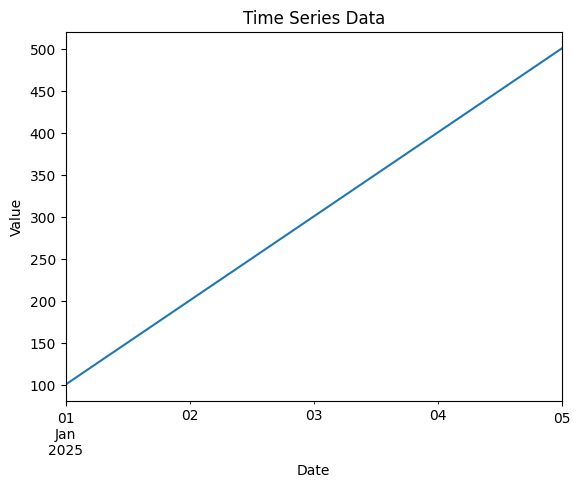

In [96]:
import matplotlib.pyplot as plt
#A line plot for "Value" over time
df['Value'].plot(title='Time Series Data', xlabel='Date', ylabel='Value')
plt.show()